In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [3]:
# Load the dataset
data = pd.read_csv(r"A:\UTD\Applied Machine Learning\Group Project\cleaned_data.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'A:\\UTD\\Applied Machine Learning\\Group Project\\cleaned_data.csv'

In [ ]:
# View Cleaned Data
data.head()

In [ ]:
# View Columns in Cleaned Data
list(data.columns)

['Gender',
 'Customer Type',
 'Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction',
 'Business',
 'Eco',
 'Eco Plus',
 'Business travel',
 'Personal Travel']

In [ ]:
# Define X, y for Cleaned Data
# using top 10 correlated predictors from EDA

var = ['Online boarding', 'Inflight wifi service', 'Business travel', 'Personal Travel', 'Inflight entertainment', 'Customer Type', 'Checkin service', 'Flight Distance', 'Age', 'Business'  ]
X=data[var]
y = data['satisfaction']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Normalize features using Min-Max Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling complete.")

Feature scaling complete.


-> Set up MinMaxScaler from scikit-learn, which is like a rulebook for adjusting all the data points so that they fit within a range of 0 to 1.
->This is like making sure all ingredients in a recipe are measured in the same unit—like cups or tablespoons—so that one doesn’t overpower the others.
-> By doing this, we ensure that no single feature has too much influence just because of its size or scale when the model is making predictions.
-> This helps the model to work better and more fairly.

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the grid of parameters to search
rf_params = {
    'n_estimators': [100, 200],  # Adjust and add more estimators as needed
    'max_depth': range(1, 5),
    'min_samples_split': range(2, 5)  # Starting from 2 because min_samples_split cannot be less than 2
}

# Define the range of CV folds to test
cv_folds_range = range(2, 6)  # From 2 to 5 folds

# Dictionary to store the best score for each CV
best_scores = {}

for folds in cv_folds_range:
    # Set up GridSearchCV with the current number of folds
    grid_rf = GridSearchCV(rf_model, rf_params, cv=folds)
    # Fit the model
    grid_rf.fit(X_train_scaled, y_train)
    # Store the best score
    best_scores[folds] = grid_rf.best_score_

# Find the number of folds with the highest score
optimal_folds = max(best_scores, key=best_scores.get)
print(optimal_folds)


5


-> Setting up and fine-tuning a machine learning model called a Random Forest Classifier.

1.Initializing the Model
   
   rf_model = RandomForestClassifier(random_state=42)
   
-> Start by creating a Random Forest model.
-> Random Forests are like a team of decision-makers (trees), each of whom makes a decision based on different sets of the data or questions, and then they vote to reach the final decision.
-> The random_state makes sure that if we run the setup again, it will create the trees in the same way, giving us consistent results each time.

2.Setting Parameters to Test
   
   rf_params = {
       'n_estimators': [100, 200],
       'max_depth': range(1, 5),
       'min_samples_split': range(2, 5)
   }
   
 -> Define a set of options (parameters) for the Random Forest to test. These include:
   -> n_estimators: How many decision-makers (trees) to include.
   -> max_depth: How many questions each decision-maker can ask before making a decision.
   -> min_samples_split: The smallest group of data that a decision-maker can look at to make a decision.
 -> These options help figure out the best setup for the model so it makes the most accurate predictions.

3.Testing Different Configurations
   
   cv_folds_range = range(2, 6)
   
-> To test how well the model works with different amounts of data each time, we use cross-validation (CV).
-> Cross-validation is like making the model practice on different parts of the data to see how well it can learn and perform. --> cv_folds_range tells it to try using the data in 2, 3, 4, and 5 separate parts.

4.Finding the Best Configuration
  
   for folds in cv_folds_range:
       grid_rf = GridSearchCV(rf_model, rf_params, cv=folds)
       grid_rf.fit(X_train_scaled, y_train)
       best_scores[folds] = grid_rf.best_score_

-> For each division of data (from 2 to 5 parts), we use `GridSearchCV` which systematically tests all the different parameter combinations defined earlier to see which one gives the best result, i.e., makes the most accurate predictions.
-> We keep track of the best score (accuracy) that the model achieves with each data division.

5.Selecting the Optimal Number of Data Divisions

   optimal_folds = max(best_scores, key=best_scores.get)
   print(optimal_folds)

-> Finally, we check which division of data (how many parts) allowed the model to perform best and print that number.
-> This tells us the optimal way to split the data during training to get the most accurate results when the model is actually used.

-> Overall, this process helps ensure that the Random Forest model is as accurate as possible by finding the best settings and the best way to practice with the data before making real predictions.

In [ ]:
# Get the best model from GridSearchCV
best_model = grid_rf.best_estimator_

-> After testing different settings in our model to see which one works best, this line of code is use to grab the version of the model that did the best job.
-> This is the model we will use going forward because it gave the best results during our tests.

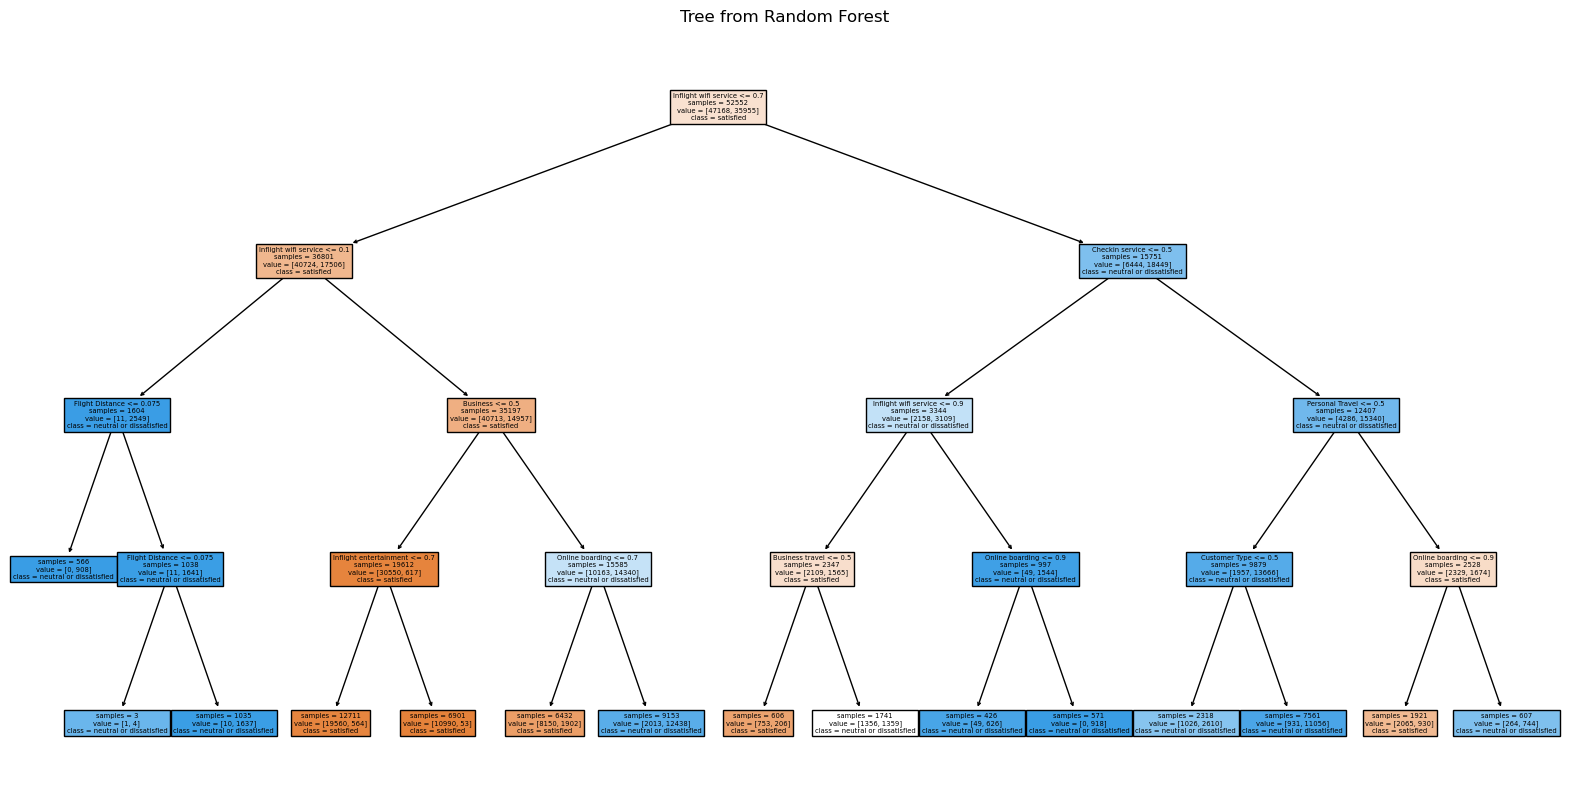

In [ ]:
# Plotting the first tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(best_model.estimators_[0], feature_names=var, class_names=['satisfied', 'neutral or dissatisfied'], filled=True, impurity=False)
plt.title('Tree from Random Forest')
plt.show()

-> This piece of code is about visually representing one of the decision trees from your Random Forest model.

-> Why only one of the decision trees?

-> We often look at just one tree from a Random Forest because:
   
   -> Easier to Understand: A Random Forest has many trees, and looking at all of them at once would be too complicated.
      Checking  one tree is simpler and lets us see how the model makes decisions without getting overwhelmed.

   -> Interpretability: Each tree in a Random Forest looks at different parts of the data to make decisions.
      By examining just one tree, you can clearly see how it decides things—like what factors it considers important and how it       uses those factors to classify something, such as whether a customer is satisfied.
   
   -> Teaching Tool: It’s helpful for explaining how the model works, especially to people who aren’t experts in ML.

   -> Check for Problems: By examining one tree, we can spot if something is wrong with how the model is learning from the data.

-> Basically, using one tree makes things more manageable and helps us understand and explain the bigger picture of how the Random Forest works.

In [ ]:
## 1. Chosen degree: this is the ...
print("Best parameters from Grid Search:", grid_rf.best_params_)


## 2. The performance is chosen based on ...
# Here, 'best_score_' would typically be based on the mean cross-validated score of the best estimator.
print("Best mean cross-validated score achieved:", grid_rf.best_score_)

## 3. Check cv_results_: dictionary
# Access the mean test scores from the cv_results_
print("Mean test scores for all parameter combinations:", grid_rf.cv_results_['mean_test_score'])

# Identify the highest mean validation score
print("Highest mean validation score:", np.max(grid_rf.cv_results_['mean_test_score']))

## 4. Check best_estimator_
# Outputs the best estimator from the Grid Search
print("Best estimator model:", grid_rf.best_estimator_)

Best parameters from Grid Search: {'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 200}
Best mean cross-validated score achieved: 0.905080454022448
Mean test scores for all parameter combinations: [0.84661294 0.8507634  0.84661294 0.8507634  0.84661294 0.8507634
 0.85271232 0.85632146 0.85271232 0.85632146 0.85271232 0.85632146
 0.87488426 0.87044515 0.87488426 0.87045718 0.87488426 0.8707459
 0.90090593 0.90506842 0.90090593 0.90508045 0.90100217 0.90483985]
Highest mean validation score: 0.905080454022448
Best estimator model: RandomForestClassifier(max_depth=4, min_samples_split=3, n_estimators=200,
                       random_state=42)


1.Best Settings for Our Model
    -> The Grid Search helped find the optimal settings for our Random Forest model. The winning combination is:
     - A maximum tree depth of 4 levels, which means each decision tree in the forest doesn't get too complex and overfit.
     - Each decision in the tree requires at least three data points, ensuring that decisions are based on more than just one or        two examples, which helps avoid overly specific rules.
     - Using 200 trees in the forest ensures robust predictions and minimizes the risk of random errors from any single tree.

2.Best Performance
    -> The highest accuracy achieved during the testing process is about 90.51%.
    -> Our model correctly predicts whether a customer is satisfied or not 90.51% of the time, based on the data it was trained
      on.
    -> This is a great accuracy rate and shows the model is well-tuned.

3.Understanding the Scores
    -> The various scores represent how well the model performed with different settings during the test phase.
    -> These scores help compare and decide which settings give the best results.
    -> The highest score among them indicates the best combination of parameters for my model.

-> This entire process is crucial for ensuring that the Random Forest model is optimized for making accurate predictions about customer satisfaction, based on the data it learned from.

In [ ]:
# Get the best model from GridSearchCV
best_model = grid_rf.best_estimator_

# Predict the test data
y_pred = best_model.predict(X_test_scaled)

1.Get the Best Model
   -> After testing different settings with GridSearchCV, we retrieve the best-performing version of the Random Forest model.
   -> This model has the optimal settings that gave the highest accuracy during testing.

2.Make Predictions on Test Data
   -> We use this best model to make predictions on the test data, which has been scaled the same way as the training data.
   -> This step involves the model using what it learned from the training process to predict outcomes for new, unseen data.

-> Essentially, we are putting the model to work, using it to predict real outcomes based on the data it hasn't seen before, to see how well it performs in practice.

In [ ]:
# Calculate accuracy, precision, recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity (True Negative Rate)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

-> Measure Model Performance:

-> Accuracy: Calculates how often the model correctly predicts whether a customer is satisfied or not.
   It’s the percentage of total predictions that were correct.

-> Precision: Measures how accurate the predictions are when the model says a customer is satisfied.
   It's the proportion of correct positive identifications.

-> Recall: This tells us how good the model is at catching all the satisfied customers.
   It's the proportion of actual positives that were correctly identified.

-> F1-Score: This is a combination of precision and recall into a single number.
   It helps us balance recall & precision & is particularly useful if the costs of false positives and false negatives are very    different.

In [ ]:
# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

Accuracy: 0.90
Precision: 0.88
Recall: 0.90
F1-score: 0.89
Specificity: 0.91


-> Accuracy (0.90): Our model correctly predicts whether a customer is satisfied or not 90% of the time.
   This is a high accuracy rate, showing that the model is generally reliable.

-> Precision (0.88): When our model predicts that a customer is satisfied, it's correct about 88% of the time.
   This indicates good reliability in the positive predictions it makes.

-> Recall (0.90): Our model is able to correctly identify 90% of all actual satisfied customers.
   This means it's very effective at catching positive cases without missing many.

-> F1-score (0.89): This score combines precision and recall into a single number, averaging at 0.89.
   It suggests a balanced model that is both accurate and inclusive in identifying satisfied customers.

-> Specificity (0.91): The model correctly identifies 91% of customers who are not satisfied.
   This indicates that the model is also effective at avoiding false alarms.

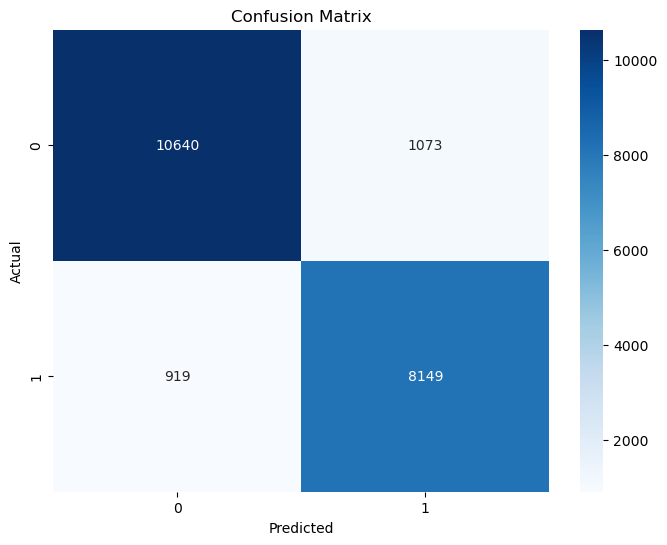

In [ ]:
# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


-> True Negatives (10,640): Our model correctly identified 10,640 customers as 'neutral or dissatisfied,' which means it’s doing    a great job of recognizing when a customer isn't satisfied.

-> False Positives (1,073): There were 1,073 instances where our model incorrectly labeled customers as 'satisfied' when they        were actually 'neutral or dissatisfied.'

-> False Negatives (919): In 919 cases, our model predicted 'neutral or dissatisfied' when the customers were actually             'satisfied.' These are opportunities our model missed to identify happy customers.

-> True Positives (8,149): The model correctly predicted 'satisfied' 8,149 times, which tells us it’s also quite effective at      spotting the satisfied customers.

-> This matrix is a useful tool for us to see where our model is getting it right and where it might need improvement.

In [ ]:
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     11713
           1       0.88      0.90      0.89      9068

    accuracy                           0.90     20781
   macro avg       0.90      0.90      0.90     20781
weighted avg       0.90      0.90      0.90     20781



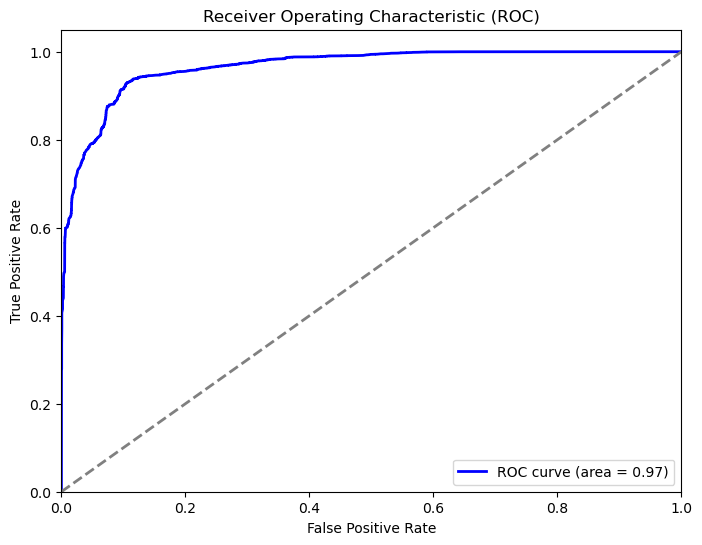

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


-> This ROC curve is a graphical representation of our model's ability to distinguish between the two classes—'satisfied' and     'neutral or dissatisfied' customers. Here’s what the curve tells me:

-> The blue line represents my model's performance. The closer it hugs the top left corner of the plot, the better it is at
   distinguishing between satisfied and dissatisfied customers.
   
-> The area under the blue curve (AUC) is 0.97, which is quite close to 1. This means our model has a high ability to
   differentiate between the classes. In practical terms, this high score suggests that there's a high chance that the model        will rank a randomly chosen 'satisfied' customer higher than a randomly chosen 'neutral or dissatisfied' one.

-> The dashed line represents the baseline performance of a random classifier. A random classifier has an AUC of 0.5 and cannot
   distinguish between satisfied and dissatisfied customers.

-> The fact that our model's curve is much higher than the dashed line all the way across the plot indicates that it performs   
   much better than random chance.
